# UTS Machine Learning

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


GAMBAR 1



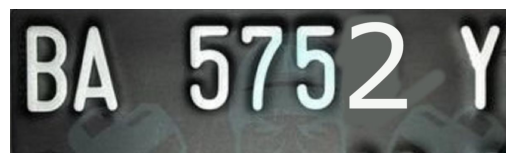


Height: 343
Width: 1183
Channels: 3



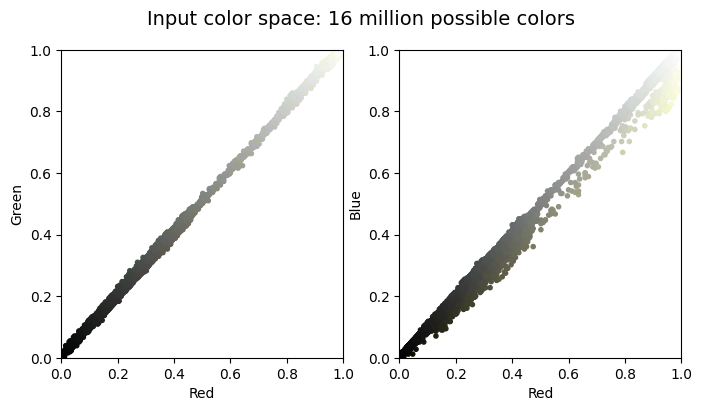

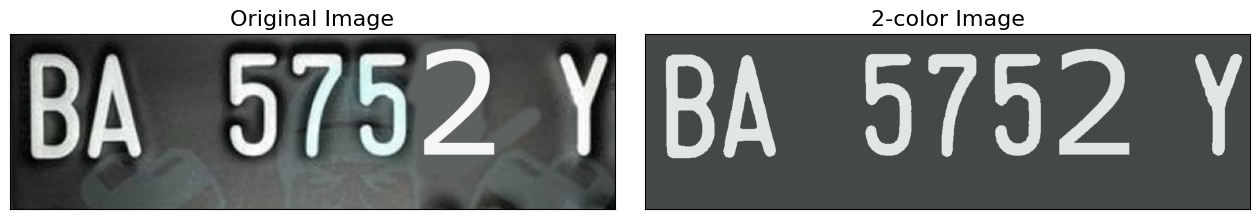


GAMBAR 2



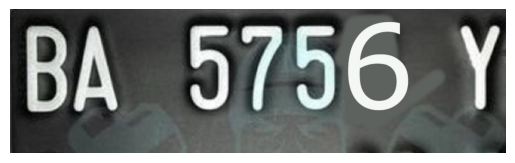


Height: 343
Width: 1183
Channels: 3



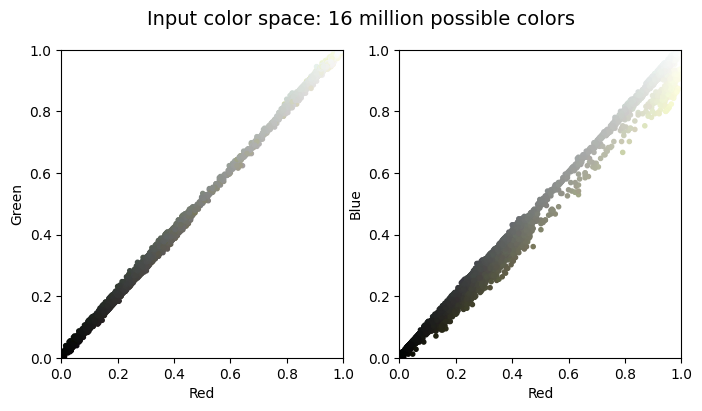

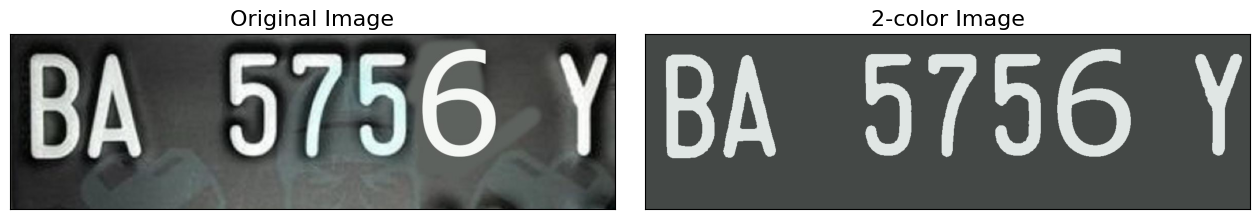


GAMBAR 3



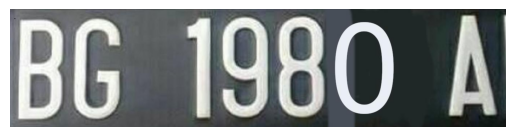


Height: 324
Width: 1366
Channels: 3



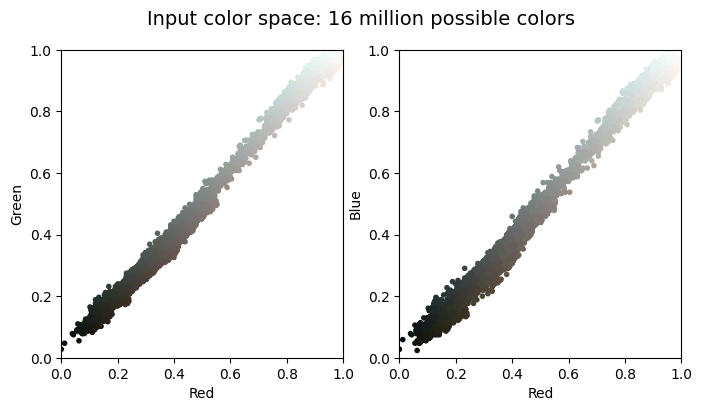

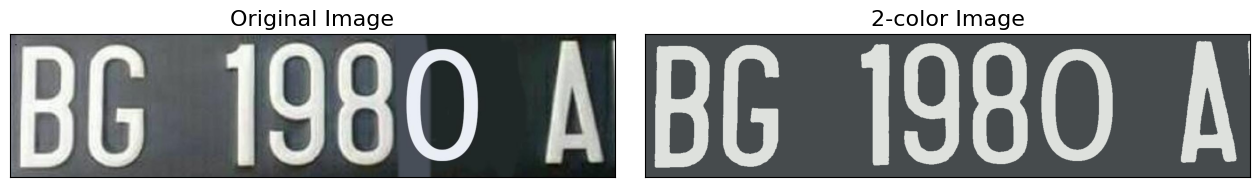


GAMBAR 4



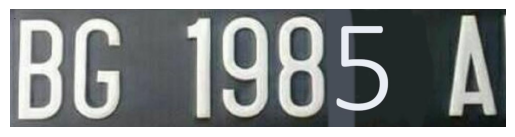


Height: 324
Width: 1366
Channels: 3



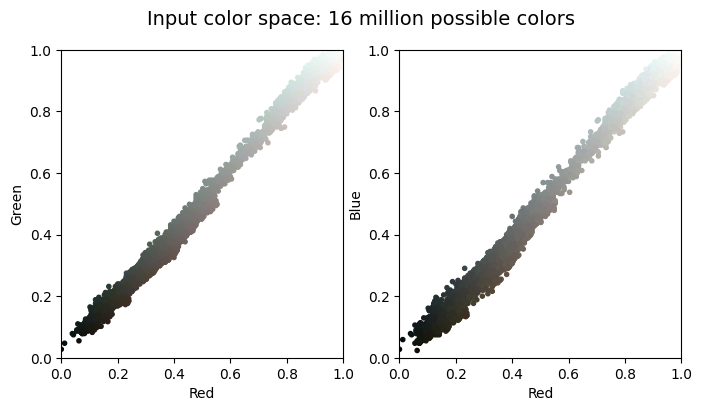

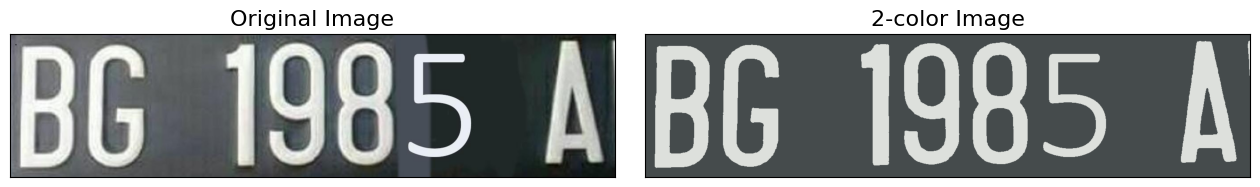


GAMBAR 5



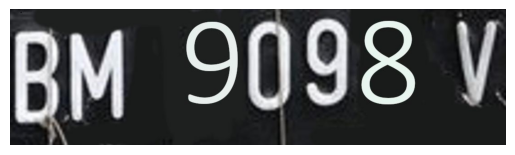


Height: 298
Width: 1089
Channels: 3



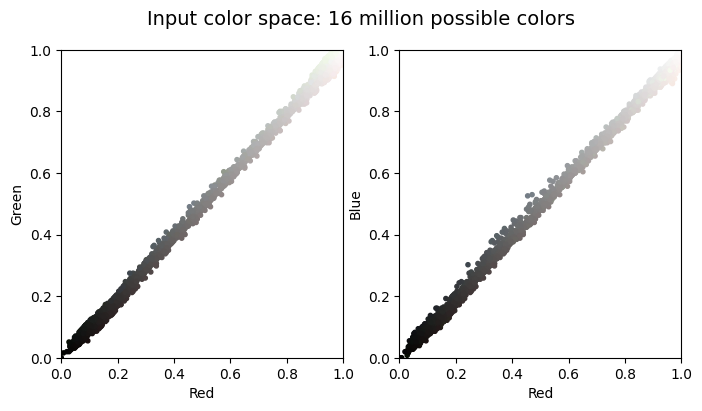

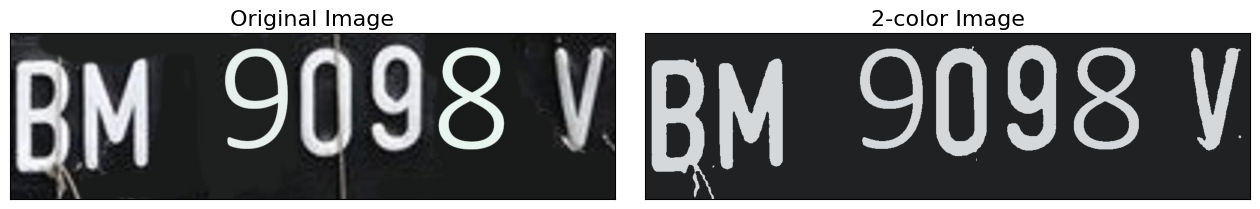

In [4]:
image_paths = [
    '/content/drive/MyDrive/ML/img1.jpg',
    '/content/drive/MyDrive/ML/img2.jpg',
    '/content/drive/MyDrive/ML/img3.jpg',
    '/content/drive/MyDrive/ML/img4.jpg',
    '/content/drive/MyDrive/ML/img5.jpg'
]

for i, img_path in enumerate(image_paths, start=1):
    print(f"\033[1mGAMBAR {i}\033[0m")
    print()
    img = cv.imread(img_path)

    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print()

    h, w, ch = img.shape
    print("Height:", h)
    print("Width:", w)
    print("Channels:", ch)
    print()

    data = img / 255.0
    data = data.reshape(h * w, ch)
    data.shape

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data

        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

        fig.suptitle(title, size=14)

    plot_pixels(data, title='Input color space: 16 million possible colors')

    kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)
    kmeans.fit(data)
    cluster_centers = kmeans.cluster_centers_
    new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_recolored = (new_colors * 255).astype(np.uint8)
    img_recolored = cv.cvtColor(img_recolored, cv.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(img_rgb)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(img_recolored)
    ax[1].set_title('2-color Image', size=16)
    plt.show()
    print()